<div>
<img src="./images/micron-flowchart.png" width="75%"/>
</div>

In [3]:
import os
import fsspec
import micron.datablocks


HOME = os.getenv('HOME')

## miR expression profiles
#### aka counts (miRCo)

## Study of clustering of miR *expression profile cluster* shows correlation with stromal/epithelial miR downregulation:
See [https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7854517/](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7854517/) including supplements.
### miRCoHN: 
* miR counts for HNSC (Head-and-Neck Squamous Cell Carcinoma)
* Downloadable from [https://gdac.broadinstitute.org/runs/stddata__2016_01_28/data/HNSC/20160128](https://gdac.broadinstitute.org/runs/stddata__2016_01_28/data/HNSC/20160128).

### Build a local miRCoHN dataset

In [20]:
# 'DBX.micron.datablocks.miRCoHN@mirco_hn'
## Store datasets on various "TOPICS" under these "roots"
mirco_hn_roots = {
	'logcounts': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoHN/mirco_hn/version={micron.datablocks.miRCoHN.VERSION}/logcounts',
	'pivots': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoHN/mirco_hn/version={micron.datablocks.miRCoHN.VERSION}/pivots',
	'logcontrols': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoHN/mirco_hn/version={micron.datablocks.miRCoHN.VERSION}/logcontrols',
	'downregulated_mirna_infixes': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoHN/mirco_hn/version={micron.datablocks.miRCoHN.VERSION}/downregulated_mirna_infixes',
}
mirco_hn = micron.datablocks.miRCoHN(verbose=True, debug=False, rm_tmp=True)
mirco_hn.build(
	mirco_hn_roots,
)
display(mirco_hn.TOPICS)
logcounts = mirco_hn.read(mirco_hn_roots, topic='logcounts')
display(logcounts.shape)
logcontrols = mirco_hn.read(mirco_hn_roots, topic='logcontrols')
display(logcontrols.shape)
logcounts.head()


>>> miRCoHN: All topics built already.  Done.


{'logcounts': 'mircohn_rpm_log2.parquet',
 'pivots': 'mircohn_pivots.parquet',
 'logcontrols': 'mircohn_controls.parquet',
 'downregulated_mirna_infixes': 'mircohn_downregulated_mirna_infixes.parquet'}

>>> miRCoHN: Reading topic 'logcounts'


(488, 2588)

>>> miRCoHN: Reading topic 'logcontrols'


(44, 2588)

,hsa-let-7a-5p,hsa-let-7a-3p,hsa-let-7a-2-3p,hsa-let-7b-5p,hsa-let-7b-3p,hsa-let-7c-5p,hsa-let-7d-5p,hsa-let-7d-3p,hsa-let-7e-5p,hsa-let-7e-3p,...,hsa-miR-7976,hsa-miR-6791-3p,hsa-miR-6753-5p,hsa-miR-6744-5p,hsa-miR-7113-5p,hsa-miR-6741-3p,hsa-miR-6715b-5p,hsa-miR-7974,hsa-miR-6846-3p,hsa-miR-7704
,MIMAT0000062,MIMAT0004481,MIMAT0010195,MIMAT0000063,MIMAT0004482,MIMAT0000064,MIMAT0000065,MIMAT0004484,MIMAT0000066,MIMAT0004485,...,MIMAT0031179,MIMAT0027483,MIMAT0027406,MIMAT0027389,MIMAT0028123,MIMAT0027384,MIMAT0025842,MIMAT0031177,MIMAT0027593,MIMAT0030019
TCGA-4P-AA8J-01A-11R-A39B-13,14.504822,5.143873,1.940001,13.138620,4.472495,9.448644,7.769270,8.412836,11.317443,4.003010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-BA-5149-01A-01R-1513-13,14.819992,5.630475,3.225721,13.020136,4.754974,8.050535,8.616476,8.769807,9.673931,2.936214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-BA-5152-01A-02R-1872-13,15.941677,4.943807,1.590171,14.256493,4.863189,8.864225,8.158338,8.020158,10.890396,2.507708,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-BA-5555-01A-01R-1513-13,15.802900,6.445344,0.295596,14.887152,6.050484,11.544371,8.233075,8.792593,9.743270,3.073204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-BA-5556-01A-01R-1513-13,15.663689,5.207313,0.944278,14.488905,5.294776,9.392189,8.385563,8.040203,9.421633,1.207313,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### miRCo summary
* Counts data contains 2588 named miR sequence (cols)
    * This is > than the number of characterized human miR sequences from mirnabase.org (below)
* There are 488 patient records (rows), all from tumor containing tissue
    * Additionally, there are 44 controls or normal tissue counts

### Clustering of miRCo expression profiles data
* Cluster vectors in the 2588-dim space
* Analogous to BOW (bag-of-words) data
    * Each seq is a "word"
    * Along with the log number (per million) of its occurrences in the "document" -- tissue record

<div>
<img src="./images/histogram-embedding-1.png" width="75%"/>
</div>

In [25]:
# 'DBX.micron.datablocks.ZSCC@zscc_mircohn'
zscc_logcounts_scope = micron.datablocks.ZSCC.SCOPE(
	data_frame=mirco_hn.read(mirco_hn_roots, topic='logcounts'),
	fillna=0.0,
)
zscc_logcounts_roots = {
	'zscc': f'{HOME}/.cache/datalake/DBX/micron/datablocks/ZSCC/zscc_mircohn/version={micron.datablocks.ZSCC.VERSION}/zscc',
	'clusters': f'{HOME}/.cache/datalake/DBX/micron/datablocks/ZSCC/zscc_mircohn/version={micron.datablocks.ZSCC.VERSION}/clusters',
	'ordering': f'{HOME}/.cache/datalake/DBX/micron/datablocks/ZSCC/zscc_mircohn/version={micron.datablocks.ZSCC.VERSION}/ordering',
}
zscc_logcounts = micron.datablocks.ZSCC(verbose=True, debug=False, rm_tmp=True)
zscc_logcounts.build(
	zscc_logcounts_roots,
	scope=zscc_logcounts_scope,
)

>>> miRCoHN: Reading topic 'logcounts'
>>> ZSCC: ZSCC already built
>>> ZSCC: ... done


<div>
<img src="./images/histogram-embedding-n.png" width="75%"/>
</div>

### Display clustered miRCo data using UMAP (cluster assignments are color-coded)

In [36]:
zscc_logcounts.TOPICS

{'zscc': 'zscc.pkl',
 'clusters': 'clusters.parquet',
 'ordering': 'ordering.pkl'}

#### `zscc` contains information about clustering, including the optimal number of clusters found
* In our case it is 2

In [41]:
display(len(zscc_logcounts.read(zscc_logcounts_roots, topic="clusters")) - zscc_logcounts.read(zscc_logcounts_roots, topic="clusters").sum()) # cluster 0 size
display(zscc_logcounts.read(zscc_logcounts_roots, topic="clusters").sum()) # cluster 1 size

Read zscc clusters from /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/zscc_mircohn/version=0.6.1/clusters/clusters.parquet
Read zscc clusters from /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/zscc_mircohn/version=0.6.1/clusters/clusters.parquet


clusters    200
dtype: int64

Read zscc clusters from /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/zscc_mircohn/version=0.6.1/clusters/clusters.parquet


clusters    288
dtype: int64

Read zscc clusters from /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/zscc_mircohn/version=0.6.1/clusters/clusters.parquet


/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


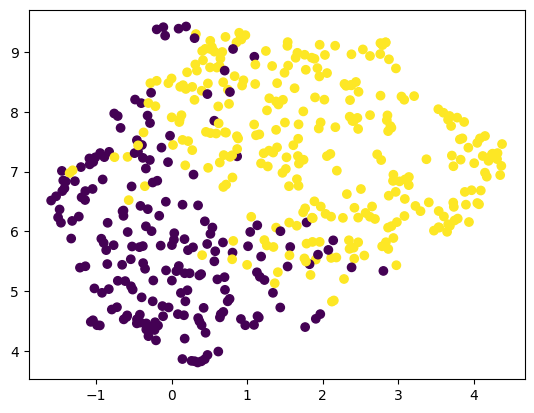

In [26]:
micron.datablocks.ZSCC.display_umap(logcounts, color=zscc_logcounts.read(zscc_logcounts_roots, topic='clusters').clusters)

### Display logcounts heatmap
* after subtracting mean control expressions
* restricting columns to sequences downregulated in epithelial/stromal histologies

In [27]:
# downregulation patterns (epithelian/stromal) can be identified based only on the top level of the two-level sequence id
# so we strip the lower level away
_logcounts = logcounts.copy()
_logcounts.columns = logcounts.columns.get_level_values(0)

In [29]:
_logcounts.head(3)

,hsa-let-7a-5p,hsa-let-7a-3p,hsa-let-7a-2-3p,hsa-let-7b-5p,hsa-let-7b-3p,hsa-let-7c-5p,hsa-let-7d-5p,hsa-let-7d-3p,hsa-let-7e-5p,hsa-let-7e-3p,...,hsa-miR-7976,hsa-miR-6791-3p,hsa-miR-6753-5p,hsa-miR-6744-5p,hsa-miR-7113-5p,hsa-miR-6741-3p,hsa-miR-6715b-5p,hsa-miR-7974,hsa-miR-6846-3p,hsa-miR-7704
TCGA-4P-AA8J-01A-11R-A39B-13,14.504822,5.143873,1.940001,13.138620,4.472495,9.448644,7.769270,8.412836,11.317443,4.003010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-BA-5149-01A-01R-1513-13,14.819992,5.630475,3.225721,13.020136,4.754974,8.050535,8.616476,8.769807,9.673931,2.936214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-BA-5152-01A-02R-1872-13,15.941677,4.943807,1.590171,14.256493,4.863189,8.864225,8.158338,8.020158,10.890396,2.507708,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
_logcontrols = logcontrols.copy()
_logcontrols.columns = logcontrols.columns.get_level_values(0)

Read zscc cluster ordering from /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/zscc_mircohn/version=0.6.1/ordering/ordering.pkl


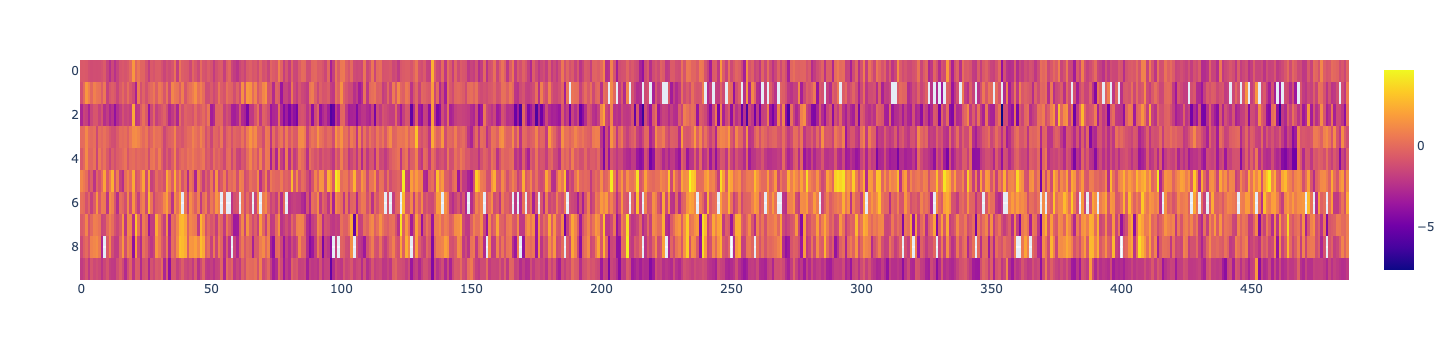

In [43]:
# There should be a discernible change left-to-right around the size of cluster 0
micron.datablocks.miRCoHN.display_heatmap(_logcounts, seq_mad_threshold=0.99, center_at_controls=_logcontrols, seq_patterns=micron.datablocks.miRCoHN.DOWNREGULATED_SEQ_PATTERNS['epithelial'], ordering=zscc_logcounts.read(zscc_logcounts_roots, topic='ordering'), nseqs=10)

Read zscc cluster ordering from /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/zscc_mircohn/version=0.6.1/ordering/ordering.pkl


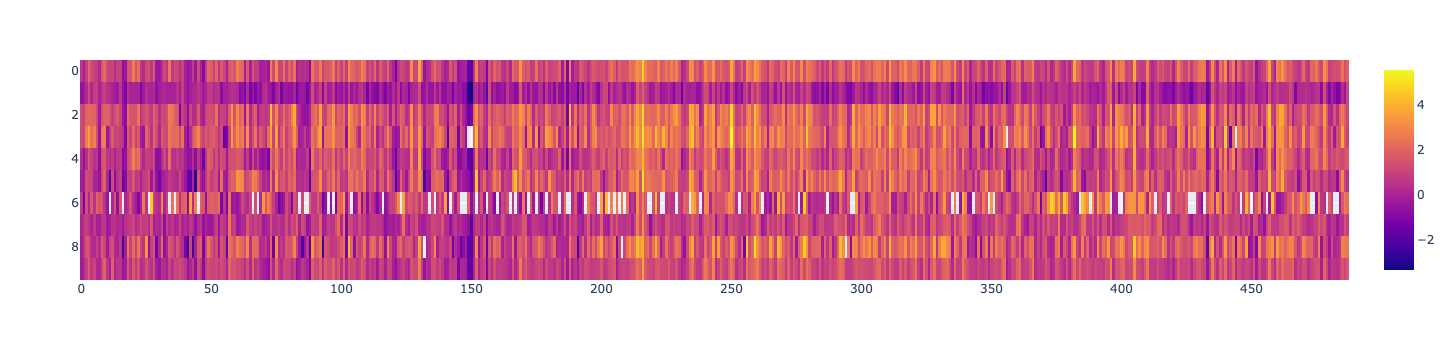

In [45]:
# There may be a change left-to-right around the size of cluster 0
micron.datablocks.miRCoHN.display_heatmap(_logcounts, seq_mad_threshold=0.99, center_at_controls=_logcontrols, seq_patterns=micron.datablocks.miRCoHN.DOWNREGULATED_SEQ_PATTERNS['stromal'], ordering=zscc_logcounts.read(zscc_logcounts_roots, topic='ordering'), nseqs=10)

## miRNA sequenses
#### aka miRSeqs
Downloadable from ["https://mirbase.org/download"]("https://mirbase.org/download")

In [51]:
# 'DBX.micron.datablocks.miRNA@mirna'
mirna_roots = f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRNA/mirna/version={micron.datablocks.miRNA.VERSION}'
mirna = micron.datablocks.miRNA(verbose=True, debug=False, rm_tmp=True)
mirna.build(mirna_roots)

>>> miRNA: miRNA already built in root /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/miRNA/mirna/version=0.2.1


In [52]:
mirnaseqs = mirna.read(mirna_roots)
display(mirnaseqs.shape)
display(mirnaseqs.head())

(1917, 3)

,ID,Accession,sequence
0,hsa-let-7a-1,MI0000060,UGGGAUGAGGUAGUAGGUUGUAUAGUUUUAGGGUCACACCCACCAC...
1,hsa-let-7a-2,MI0000061,AGGUUGAGGUAGUAGGUUGUAUAGUUUAGAAUUACAUCAAGGGAGA...
2,hsa-let-7a-3,MI0000062,GGGUGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUAUGG...
3,hsa-let-7b,MI0000063,CGGGGUGAGGUAGUAGGUUGUGUGGUUUCAGGGCAGUGAUGUUGCC...
4,hsa-let-7c,MI0000064,GCAUCCGGGUUGAGGUAGUAGGUUGUAUGGUUUAGAGUUACACCCU...


## miRSeqs sequences sampled according to miRCo
* There are different numbers of seqs in miRCo (2588) and mirSeqs (1917)
* Sequence IDs do not match

- We form the "join" or intersection of sequences based on the numeric part of the second component of their IDs:
For example, miRSeq `hsa-let-7a-2	MI0000061` is mapped to `0000061`, which is then matched to the miRCo seq with the second component of ID of the form `xxxxx0000061`
 
- This way we obtain 229 joint seqs (jseqs)
- All IDs are mapped back the miRCo seq IDs
- `jlogcounts` and `jlogcontrols` are miRCo records restricted to the jseqs


In [59]:
# 'DBX.micron.datablocks.miRCoSeqs@mircoseqshn_1000_300'
mircoseqshn_1000_300_scope = {'logcounts': 'DBX.micron.datablocks.miRCoHN@{micron.datablocks.miRCoHN.VERSION}#mirco_hn:logcounts', 'logcontrols': 'DBX.micron.datablocks.miRCoHN@{micron.datablocks.miRCoHN.VERSION}#mirco_hn:logcontrols', 'seqs': 'DBX.micron.datablocks.miRNA@{micron.datablocks.miRNA.VERSION}#mirna:', 'npasses': 1000, 'nseqs_per_record': 300}
mircoseqshn_1000_300_roots = {
	'logcounts': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/mircoseqshn_1000_300/version={micron.datablocks.miRCoSeqs.VERSION}/logcounts',
	'counts': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/mircoseqshn_1000_300/version={micron.datablocks.miRCoSeqs.VERSION}/counts',
	'logcontrols': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/mircoseqshn_1000_300/version={micron.datablocks.miRCoSeqs.VERSION}/logcontrols',
	'seqs': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/mircoseqshn_1000_300/version={micron.datablocks.miRCoSeqs.VERSION}/seqs',
	'samples': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/mircoseqshn_1000_300/version={micron.datablocks.miRCoSeqs.VERSION}/samples',
	'rec_sample_ranges': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/mircoseqshn_1000_300/version={micron.datablocks.miRCoSeqs.VERSION}/rec_sample_ranges',
}
mircoseqshn_1000_300 = micron.datablocks.miRCoSeqs(verbose=True, debug=False, rm_tmp=True)
mircoseqshn_1000_300.build(mircoseqshn_1000_300_roots, scope=mircoseqshn_1000_300_scope)
jseqs = mircoseqshn_1000_300.read(mircoseqshn_1000_300_roots, topic='seqs')
display(mircoseqshn_1000_300_seqs.shape)

>>> miRCoSeqs: miRCoSeqs already built
>>> miRCoSeqs: ... done


(229, 3)

### jclustering: are the restricted counts still cluster in a manner aligned with downregulation?
#### We test `jlogcount` against `jlogcontrols`, restricted to `epithelial` and `stromal` downregulated seqs

In [71]:
jlogcounts = mircoseqshn_1000_300.read(mircoseqshn_1000_300_roots, topic='logcounts')
jlogcontrols = mircoseqshn_1000_300.read(mircoseqshn_1000_300_roots, topic='logcontrols')

#### cluster `jlogcounts`

In [106]:
# 'DBX.micron.datablocks.ZSCC@zscc_mircoseqshnlog'
zscc_mircoseqshnlog_scope = micron.datablocks.ZSCC.SCOPE(
	data_frame=mircoseqshn_1000_300.read(mircoseqshn_1000_300_roots, topic='logcounts'),
	fillna=0.0,
)
zscc_mircoseqshnlog_roots = {
	'zscc': f'{HOME}/.cache/datalake/DBX/micron/datablocks/ZSCC/zscc_mircoseqshnlog/version={micron.datablocks.ZSCC.VERSION}/zscc',
	'clusters': f'{HOME}/.cache/datalake/DBX/micron/datablocks/ZSCC/zscc_mircoseqshnlog/version={micron.datablocks.ZSCC.VERSION}/clusters',
	'ordering': f'{HOME}/.cache/datalake/DBX/micron/datablocks/ZSCC/zscc_mircoseqshnlog/version={micron.datablocks.ZSCC.VERSION}/ordering',
}
zscc_mircoseqshnlog = micron.datablocks.ZSCC(verbose=True, debug=False, rm_tmp=True)
zscc_mircoseqshnlog.build(
	zscc_mircoseqshnlog_roots,
	scope=zscc_mircoseqshnlog_scope,
)

>>> ZSCC: ZSCC already built
>>> ZSCC: ... done


In [108]:
zscc_jlogcounts_clusters = zscc_mircoseqshnlog.read(zscc_mircoseqshnlog_roots, topic="clusters").clusters
zscc_jlogcounts_ordering = zscc_mircoseqshnlog.read(zscc_mircoseqshnlog_roots, topic="ordering")
display(len(zscc_jlogcounts_clusters) - zscc_jlogcounts_clusters.sum())
display(zscc_jlogcounts_clusters.sum())

Read zscc clusters from /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/zscc_mircoseqshnlog/version=0.6.1/clusters/clusters.parquet
Read zscc cluster ordering from /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/zscc_mircoseqshnlog/version=0.6.1/ordering/ordering.pkl


267

221

/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



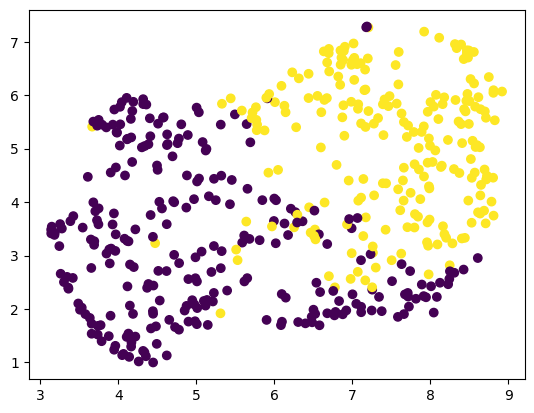

In [70]:
micron.datablocks.ZSCC.display_umap(jlogcounts, color=zscc_jlogcounts_clusters)

In [72]:
_jlogcounts = jlogcounts.copy()
_jlogcounts.columns = _jlogcounts.columns.get_level_values(0)

In [74]:
_jlogcontrols = jlogcontrols.copy()
_jlogcontrols.columns = _jlogcontrols.columns.get_level_values(0)

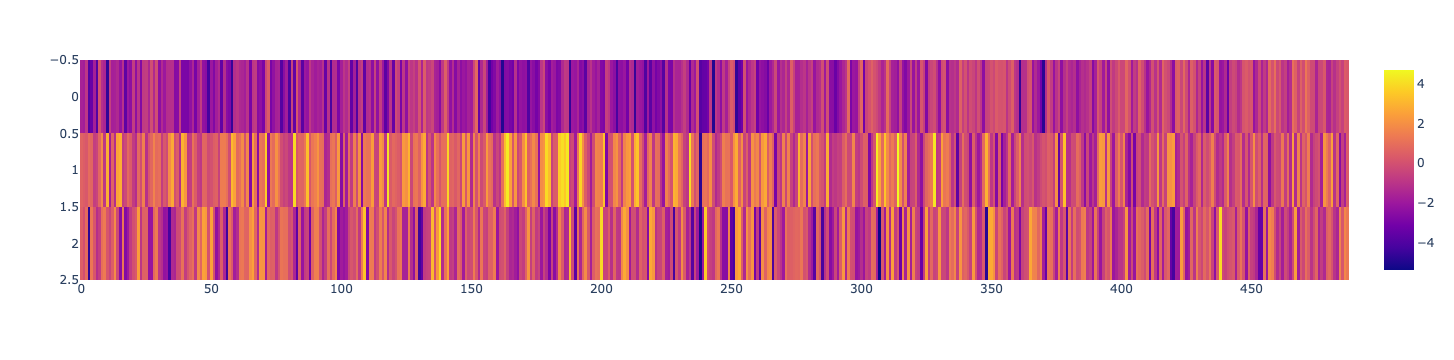

In [81]:
micron.datablocks.miRCoHN.display_heatmap(_jlogcounts, seq_mad_threshold=0.9, center_at_controls=_jlogcontrols, ordering=zscc_jlogcounts_ordering, seq_patterns=micron.datablocks.miRCoHN.DOWNREGULATED_SEQ_PATTERNS['epithelial'],)

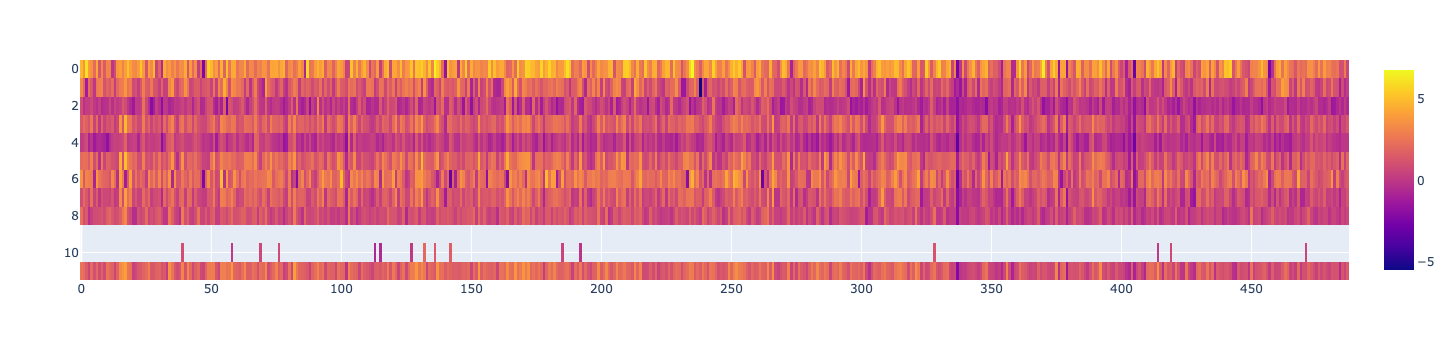

In [82]:
micron.datablocks.miRCoHN.display_heatmap(_jlogcounts, seq_mad_threshold=0.9, center_at_controls=_jlogcontrols, ordering=zscc_jlogcounts_ordering, seq_patterns=micron.datablocks.miRCoHN.DOWNREGULATED_SEQ_PATTERNS['stromal'],)

#### `jcounts` clustering

In [101]:
_jcounts = micron.datablocks.miRCoSeqs.expcounts(_jlogcounts)
_jcontrols = micron.datablocks.miRCoSeqs.expcounts(_jlogcontrols)

In [111]:
# 'DBX.micron.datablocks.ZSCC@mircoseqhnco'
mircoseqhnco_scope = micron.datablocks.ZSCC.SCOPE(
	data_frame=mircoseqshn_1000_300.read(mircoseqshn_1000_300_roots, topic='counts'),
	fillna=0.0,
)
mircoseqhnco_roots = {
	'zscc': f'{HOME}/.cache/datalake/DBX/micron/datablocks/ZSCC/mircoseqhnco/version={micron.datablocks.ZSCC.VERSION}/zscc',
	'clusters': f'{HOME}/.cache/datalake/DBX/micron/datablocks/ZSCC/mircoseqhnco/version={micron.datablocks.ZSCC.VERSION}/clusters',
	'ordering': f'{HOME}/.cache/datalake/DBX/micron/datablocks/ZSCC/mircoseqhnco/version={micron.datablocks.ZSCC.VERSION}/ordering',
}
mircoseqhnco = micron.datablocks.ZSCC(verbose=True, debug=False, rm_tmp=True)
mircoseqhnco.build(
	mircoseqhnco_roots,
	scope=mircoseqhnco_scope,
)

>>> ZSCC: ZSCC already built
>>> ZSCC: ... done


In [117]:
zscc_jcounts_clusters = mircoseqhnco.read(mircoseqhnco_roots, topic="clusters").clusters
zscc_jcounts_ordering = mircoseqhnco.read(mircoseqhnco_roots, topic="ordering")
display(len(zscc_jlogcounts_clusters) - zscc_jlogcounts_clusters.sum())
display(zscc_jlogcounts_clusters.sum())

Read zscc clusters from /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/mircoseqhnco/version=0.6.1/clusters/clusters.parquet
Read zscc cluster ordering from /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/mircoseqhnco/version=0.6.1/ordering/ordering.pkl


305

183

## Seq embedding: FastText
### Minimize a cross-entropy reconstruction loss 
* mapping words to vectors
* based on the word's context
<div>
<img src="./images/fasttext-cbow.png" width="65%"/>
</div>

### miR seqs sampled according to miRCo
* Restricted to `jseqs`
* For miR the context is invariant to rearrangements
* determined only by co-expressed miR sequences
* with probability derived from joint expression frequences

### Training
* Taking 1000 passes through all exponentiated `jcount` records
* Generating 300 multinomial seq samples according to each record's frequencies
* Each 300-seq "bag" is a FastText context

### Testing
* 1 pass
* Concatenate all 300 embedding vectors for each record into a single 300000-dim vector
* Visualizing with `umap` using `jlogcount` cluster assignments

<div>
<img src="./images/histogram-seq-fasttext-embedding.png" width="75%"/>
</div>

In [85]:
# 'DBX.micron.datablocks.FastText@microseqscbow'
microseqscbow_scope = micron.datablocks.FastText.SCOPE(
	samples_path=mircoseqshn_1000_300_roots['samples'],
	model='cbow',
	dim=100,
	context_window_size=300,
)
microseqscbow_roots = f'{HOME}/.cache/datalake/DBX/micron/datablocks/FastText/microseqscbow/version={micron.datablocks.FastText.VERSION}'
microseqscbow = micron.datablocks.FastText(verbose=True, debug=False, rm_tmp=True)
microseqscbow.build(
	microseqscbow_roots,
	scope=microseqscbow_scope,
)

>>> FastText: '{scope.model}' already built


In [88]:
cbow = microseqscbow.read(microseqscbow_roots)

#### Using single pass jseq samples to generate record embeddings

In [90]:
# 'DBX.micron.datablocks.miRCoSeqs@mircoseqshn_1_300'
mircoseqshn_1_300_scope = micron.datablocks.miRCoSeqs.SCOPE(
	logcounts=mirco_hn.read(mirco_hn_roots, topic='logcounts'),
	logcontrols=mirco_hn.read(mirco_hn_roots, topic='logcontrols'),
	seqs=mirna.read(mirna_roots, ),
	npasses=1,
	nseqs_per_record=300,
)
mircoseqshn_1_300_roots = {
	'logcounts': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/mircoseqshn_1_300/version={micron.datablocks.miRCoSeqs.VERSION}/logcounts',
	'counts': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/mircoseqshn_1_300/version={micron.datablocks.miRCoSeqs.VERSION}/counts',
	'logcontrols': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/mircoseqshn_1_300/version={micron.datablocks.miRCoSeqs.VERSION}/logcontrols',
	'seqs': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/mircoseqshn_1_300/version={micron.datablocks.miRCoSeqs.VERSION}/seqs',
	'samples': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/mircoseqshn_1_300/version={micron.datablocks.miRCoSeqs.VERSION}/samples',
	'rec_sample_ranges': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/mircoseqshn_1_300/version={micron.datablocks.miRCoSeqs.VERSION}/rec_sample_ranges',
}
mircoseqshn_1_300 = micron.datablocks.miRCoSeqs(verbose=True, debug=False, rm_tmp=True)
mircoseqshn_1_300.build(
	mircoseqshn_1_300_roots,
	scope=mircoseqshn_1_300_scope,
)
mircoseqshn_1_300_samples = mircoseqshn_1_300.read(mircoseqshn_1_300_roots, topic="samples")
mircoseqshn_1_300_rec_sample_ranges = mircoseqshn_1_300.read(mircoseqshn_1_300_roots, topic="rec_sample_ranges")

>>> miRCoHN: Reading topic 'logcounts'
>>> miRCoHN: Reading topic 'logcontrols'
>>> miRCoSeqs: miRCoSeqs already built
>>> miRCoSeqs: ... done
>>> miRCoSeqs: Read 146401 useqs


#### Concatenate

In [93]:
import numpy as np
cbowsamples1_ = np.array([[cbow[sample] for sample in mircoseqshn_1_300_samples[r[0]:r[1]]] for r in mircoseqshn_1_300_rec_sample_ranges.iloc[:, 0]])
shape1_ = cbowsamples1_.shape
cbowsamples1 = cbowsamples1_.reshape(shape1_[0], shape1_[-2]*shape1_[-1])
cbowsamples1.shape

(488, 30000)

#### UMAP with jlogcount clusters for colors

/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



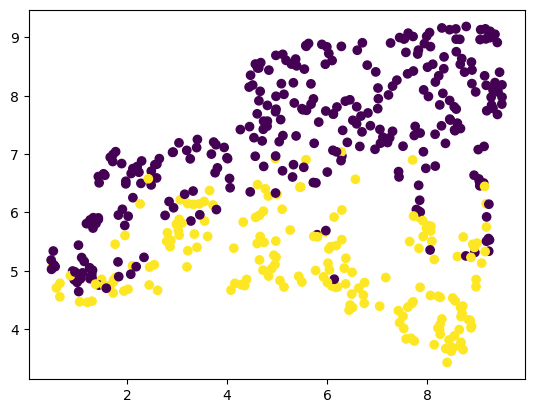

In [120]:
import pandas as pd
micron.datablocks.FastText.display_umap(pd.DataFrame(cbowsamples1), color=zscc_jlogcounts_clusters)

#### Observe good separation of precomputed clusters:
* Despite the fact that the clusters were computed using expression count profiles
* And even though word2vec embeddings were computed on partial sequences (only a subset of sequences are present in 300 multinomial samples)
* Word embeddings capture the cluster separation

#### As well as using `jcount` clusters

/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



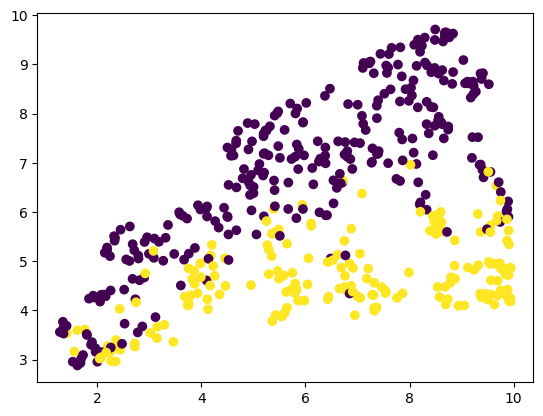

In [123]:
import pandas as pd
micron.datablocks.FastText.display_umap(pd.DataFrame(cbowsamples1), color=zscc_jcounts_clusters)